In [1]:
# Import neccasary libraries

import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read in required data

loan = pd.read_csv("data/loan.csv", sep=",")
payment = pd.read_csv("data/payment.csv", sep = ",")
clarity = pd.read_csv("data/clarity_underwriting_variables.csv", sep = "," , low_memory=False)

# 1. Loan Data Exploratory Analysis

In [3]:
## Inspect loan data frame

loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [4]:
## Type of loan columns

loan.dtypes

loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

In [5]:
## Inspect loan data column

print (loan.columns)
print('\n')
print('Statitistic of numerical varables: \n ' , loan.describe())

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')


Statitistic of numerical varables: 
                   apr       nPaidOff       isFunded     loanAmount  \
count  573760.000000  577658.000000  577682.000000  575432.000000   
mean      553.080972       0.037887       0.067480     514.245084   
std       110.046159       0.333366       0.250852     320.939929   
min         0.000000       0.000000       0.000000       0.000000   
25%       490.000000       0.000000       0.000000     350.000000   
50%       590.000000       0.000000       0.000000     500.000000   
75%       601.000000       0.000000       0.000000     500.000000   
max       705.590000      21.000000       1.000000    5000.000000   

       originallySc

In [6]:
## Inspect Number of Rows and Number of loanID
print('Number of rows of loan data ', len(loan))
print('Number of unique loanId', len(set(loan['loanId'])))

Number of rows of loan data  577682
Number of unique loanId 577427


In [7]:
## Inspect Number of anon_ssn 
print('Number of unique anon_ssn', len(set(loan['anon_ssn'])))

Number of unique anon_ssn 459393


In [8]:
## Check null vlaues for loan data frame

loan.isnull().sum()

loanId                                 256
anon_ssn                                 0
payFrequency                          1273
apr                                   3922
applicationDate                          0
originated                               0
originatedDate                      531638
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525959
clarityFraudId                      219989
hasCF                                    0
dtype: int64

# 1.1 Graph Exploratory Analysis

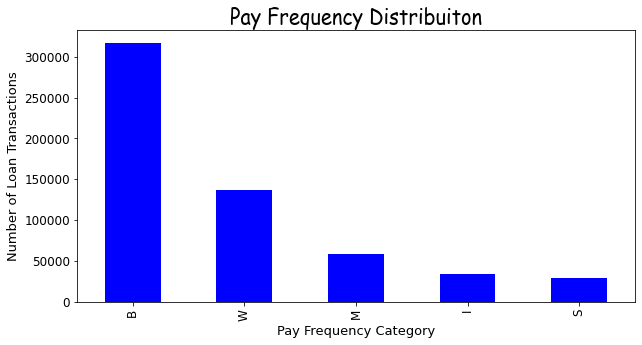

In [9]:
#Pay Frequency Columns

%matplotlib inline

ax = loan['payFrequency'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='b')
ax.set_xlabel("Pay Frequency Category", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Pay Frequency Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

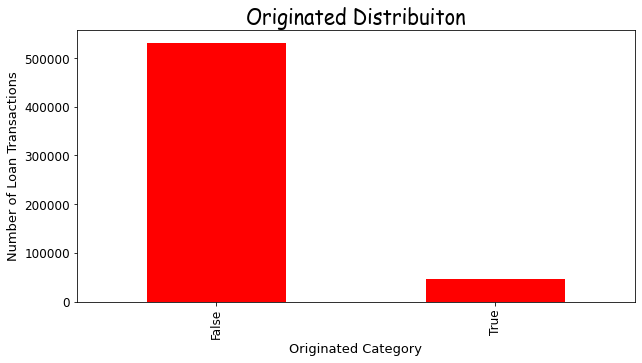

In [10]:
# Originated Columns

%matplotlib inline

ax = loan['originated'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='r')
ax.set_xlabel("Originated Category", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Originated Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

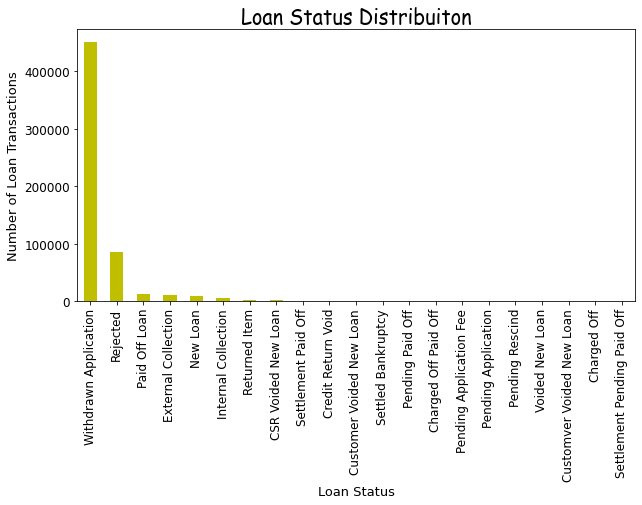

In [11]:
# Loan Status Columns

%matplotlib inline

ax = loan['loanStatus'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='y')
ax.set_xlabel("Loan Status", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Loan Status Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

In [12]:
loan['loanStatus'].value_counts()

Withdrawn Application          450984
Rejected                        85070
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                326
Pending Paid Off                  169
Charged Off Paid Off              160
Pending Application Fee             5
Pending Application                 4
Pending Rescind                     4
Voided New Loan                     2
Customver Voided New Loan           1
Charged Off                         1
Settlement Pending Paid Off         1
Name: loanStatus, dtype: int64

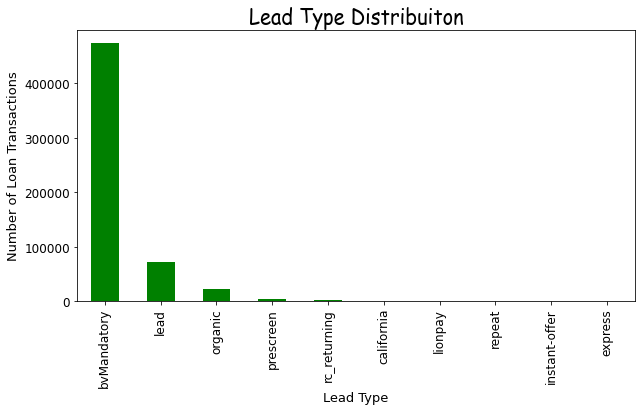

In [13]:
# Lead Type

%matplotlib inline

ax = loan['leadType'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='g')
ax.set_xlabel("Lead Type", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Lead Type Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

In [14]:
loan['leadType'].value_counts()

bvMandatory      475001
lead              72673
organic           22851
prescreen          4515
rc_returning       2069
california          479
lionpay              26
repeat               24
instant-offer        22
express              22
Name: leadType, dtype: int64

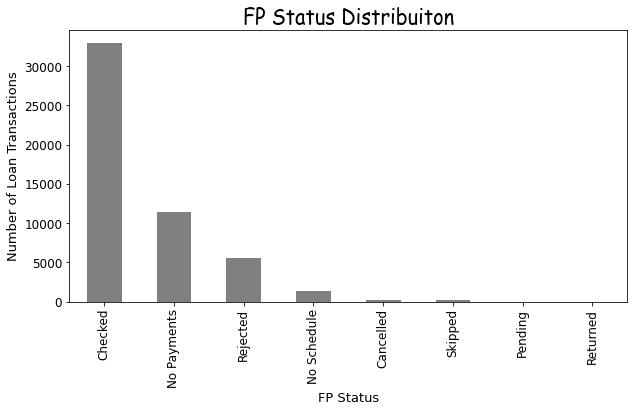

In [15]:
# fp Status Column

%matplotlib inline

ax = loan['fpStatus'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='grey')
ax.set_xlabel("FP Status", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("FP Status Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()


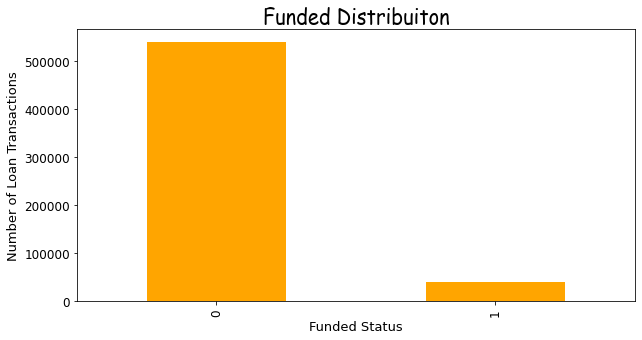

In [16]:
# is funded  Column

%matplotlib inline

ax = loan['isFunded'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='orange')
ax.set_xlabel("Funded Status", fontsize=13)
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Funded Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()


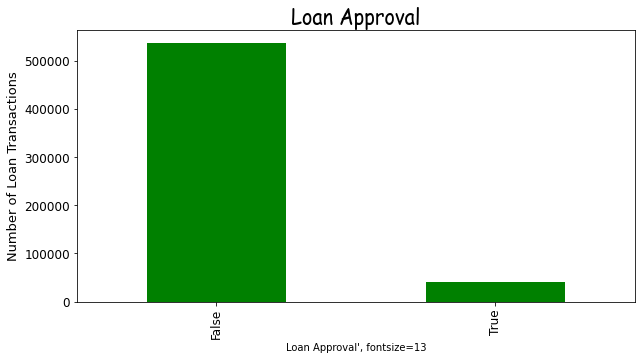

In [17]:
# Loan Approved
%matplotlib inline

ax = loan['approved'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color ='green')
ax.set_xlabel("Loan Approval', fontsize=13")
ax.set_ylabel("Number of Loan Transactions", fontsize=13)
ax.set_title("Loan Approval", fontname='Comic Sans MS', fontsize=20)
plt.show()

In [18]:
loan['approved'].value_counts()

False    537646
True      40036
Name: approved, dtype: int64

# 2. Payment  Data Exploratory Analysis

In [19]:
payment.head(10)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
5,LL-I-00000021,6,False,2015-02-27T05:00:00,51.97,117.64,169.61,Checked,NaN
6,LL-I-00000021,7,False,2015-03-13T04:00:00,61.54,108.07,169.61,Checked,NaN
7,LL-I-00000021,8,False,2015-03-27T04:00:00,72.87,96.74,169.61,Checked,NaN
8,LL-I-00000021,9,False,2015-04-10T04:00:00,86.29,83.32,169.61,Checked,NaN
9,LL-I-00000021,10,False,2015-04-24T04:00:00,102.17,67.44,169.61,Rejected,R01


In [20]:
## Type of payment columns

payment.dtypes

loanId                object
installmentIndex       int64
isCollection            bool
paymentDate           object
principal            float64
fees                 float64
paymentAmount        float64
paymentStatus         object
paymentReturnCode     object
dtype: object

In [21]:
## Inspect loan data column

print (payment.columns)
print('\n')
print('Statitistic of numerical varables: \n ' , payment.describe())

Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')


Statitistic of numerical varables: 
         installmentIndex      principal           fees  paymentAmount
count     689364.000000  689364.000000  689364.000000  689364.000000
mean          10.553222      45.557543      67.003994     112.680232
std            8.049530      81.724683      59.789510     105.783710
min            1.000000    -303.370000     -42.560000    -337.700000
25%            5.000000      13.180000      28.820000      56.810000
50%            9.000000      27.610000      51.300000      86.340000
75%           14.000000      53.380000      86.440000     135.090000
max          105.000000    4000.000000    1257.710000    4063.600000


In [22]:
## Inspect Number of Rows and Number of loanID
print('Number of rows of payment data ', len(payment))
print('Number of unique loanId in payment data', len(set(payment['loanId'])))

Number of rows of payment data  689364
Number of unique loanId in payment data 39952


In [23]:
## Check null vlaues for payment data frame

payment.isnull().sum()

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus             0
paymentReturnCode    657831
dtype: int64

# 2.1 Graph Exploratory Analysis

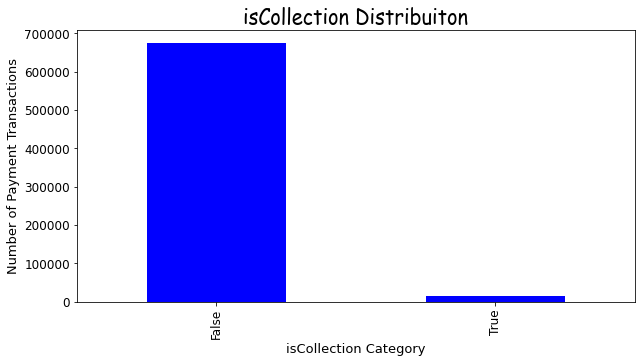

In [24]:
#is Collection Columns

%matplotlib inline

ax = payment['isCollection'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='b')
ax.set_xlabel("isCollection Category", fontsize=13)
ax.set_ylabel("Number of Payment Transactions", fontsize=13)
ax.set_title("isCollection Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

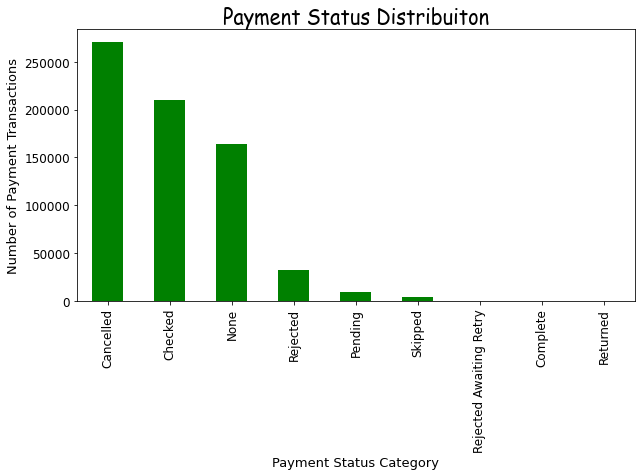

In [25]:
#paymentStatus Columns

%matplotlib inline

ax = payment['paymentStatus'].value_counts().plot(kind='bar', figsize=(10, 5), legend=False, fontsize=12,color='green')
ax.set_xlabel("Payment Status Category", fontsize=13)
ax.set_ylabel("Number of Payment Transactions", fontsize=13)
ax.set_title("Payment Status Distribuiton", fontname='Comic Sans MS', fontsize=20)
plt.show()

In [26]:
payment['paymentStatus'].value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Complete                        1
Returned                        1
Name: paymentStatus, dtype: int64

# 3. Clarity UnderWritting Variables Data Exploratory Analysis

In [27]:
clarity.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [28]:
## Inspect columns

clarity.columns

Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentw

In [29]:
clarity.dtypes

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                               float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                     float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                       float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                     float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                    float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                   float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                            float64
.

In [30]:
clarity.isnull().sum()

.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                                   2
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                           2
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                         2
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                        2
.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago                                       2
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                                2
.underwritingdatacl

In [31]:
len(clarity)

49752

In [32]:
len(set(clarity['underwritingid']))

49752